In [71]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [72]:
def f(x):
    return 3*x**2 -4*x + 5

In [73]:
f(3.0)

20.0

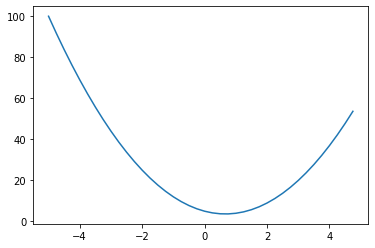

In [74]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
# print(xs)
# print(ys)
plt.plot(xs,ys)

In [75]:
h = 0.000001
x = 2/3
(f(x + h) -f(x))/h

2.999378523327323e-06

In [76]:
h = 0.00000001
x = -3.0
(f(x + h) -f(x))/h

-22.00000039920269

In [77]:
def f(a,b,c):
    return a * b + c

a = 2.0
b = -3.0
c = 10.0
f(a,b,c)

4.0

In [78]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c
c +=h

d2 = a*b + c

print(f'd1 : {d1}')
print(f'd2 : {d2}')
print(f'slop: {(d2-d1)/h}')


d1 : 4.0
d2 : 4.0001
slop: 0.9999999999976694


In [167]:
class Value:
    def __init__(self, data, _children = (), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    
    def __repr__(self):
        return f'Value(data={self.data})'
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0*out.grad
            other.grad = 1.0*out.grad
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data*out.grad
            other.grad += self.data*out.grad
        out._backward = _backward
        return out
        
        
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        def _backward():
            self.grad += (1 - (t**2))*out.grad
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
        

In [150]:
from graphviz import Digraph

def trace(root):
    
  # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [151]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd' # when '+' between the objects python will internally call a.__add__(b)
# when '*' between the objects python will internally call a.__mul__(b)
# a.__mul__(b).__add__(c)
f =Value(-2.0, label='f')
L = d*f; L.label = 'L'

In [152]:

L.grad = 1.0

# dl/dl


# l = f*d
#dl/df = d
#dl/dd = f
d.grad = -2.0
f.grad = 4.0

#l = f*d
#d = e + c
#dd/de = 1.0
#dd/dc = 1.0
#dl/de = dl/dd*dd/de
#dl/dc = dl/dd*dd/dc

e.grad =-2.0
c.grad  =-2.0

#e = a*b
#dl/da = dl/de*de/da
#dl/de = dl/dd*dd/de
#de/da = b
#de/db = a

a.grad = -3.0*-2.0
b.grad = 2.0*-2.0




In [153]:
alpha = 0.001
a.data += alpha*a.grad
b.data +=alpha*b.grad
c.data +=alpha*c.grad
f.data += alpha*f.grad


e =  a*b
d = e + c
L = f*d
print(L.data)


-7.928064095999999


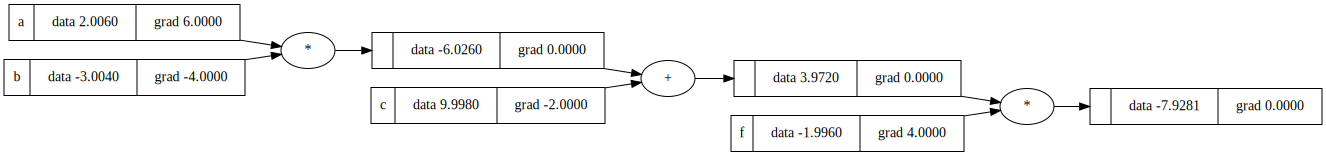

In [154]:
draw_dot(L)

In [155]:
def lol():
    h = 0.001
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd' # when '+' between the objects python will internally call a.__add__(b)
    # when '*' between the objects python will internally call a.__mul__(b)
    # a.__mul__(b).__add__(c)
    f =Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    # e.data +=h
    d = e + c; d.label = 'd' # when '+' between the objects python will internally call a.__add__(b)
    # when '*' between the objects python will internally call a.__mul__(b)
    # a.__mul__(b).__add__(c)
    f =Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data
    print((L2 - L1)/h)
lol()

0.0


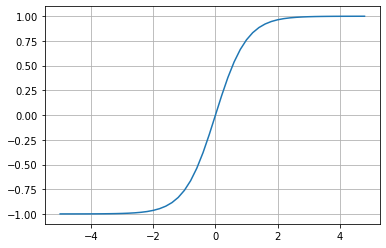

In [156]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

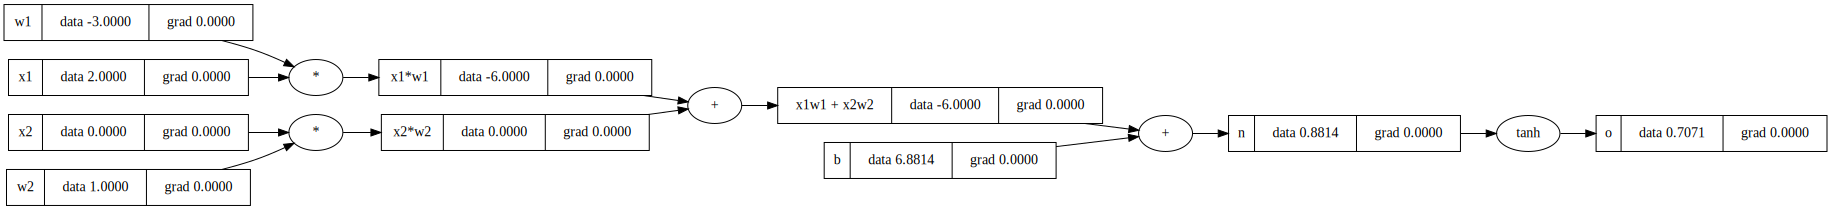

In [168]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.8813735870195432, label='b')

# forward pass

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n' 
o = n.tanh(); o.label = 'o'

draw_dot(o)





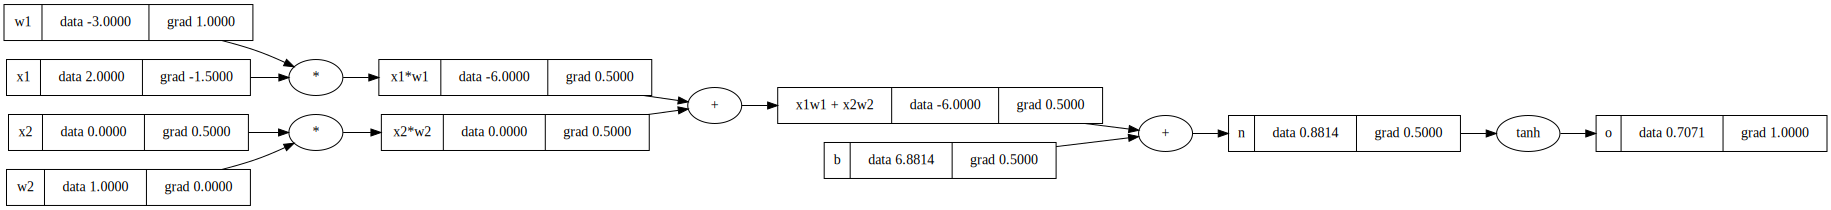

In [169]:
# o.grad = 1.0
# o._backward()
# n._backward()
# b._backward()
# x1w1x2w2._backward()
# x1w1._backward()
# x2w2._backward()

# x1._backward()
# w1._backward()
# x2._backward()
# w2._backward()
o.backward()
draw_dot(o)

In [161]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

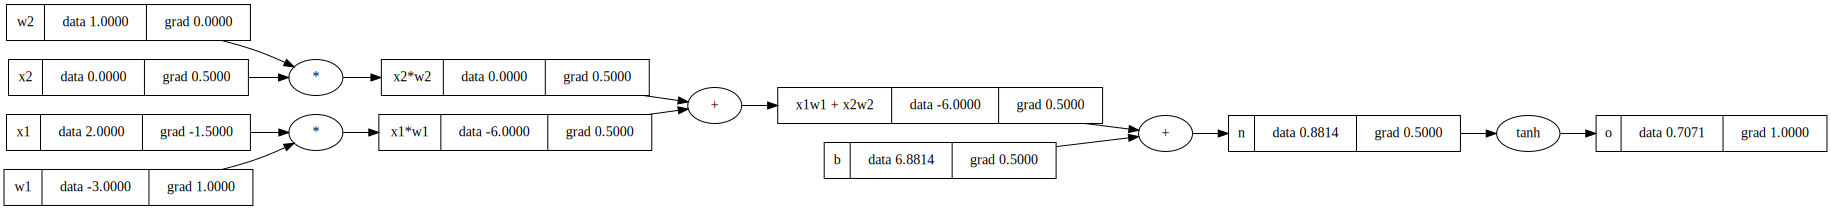

In [166]:
# o.grad = 1.0
# n.grad = 0.5



# x1w1x2w2.grad = 0.5
# b.grad = 0.5

# x1w1.grad = 0.5
# x2w2.grad = 0.5


# x1.grad = w1.data * x1w1.grad
# w1.grad = x1.data * x1w1.grad

# x2.grad = w2.data * x2w2.grad
# w2.grad = x2.data * x2w2.grad


draw_dot(o)



# do/dn = d(tanh)/dn = 1  - tanh**2

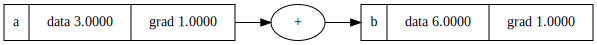

In [ ]:
a = Value(3.0, label = 'a')
# b = Value(3.0, label = b?)
b = a + a ; b.label = 'b'

b.backward()
draw_dot(b)

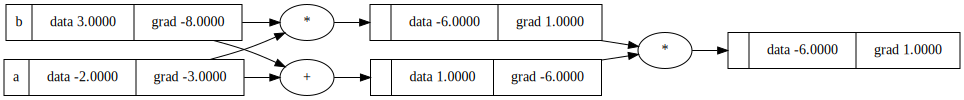

In [174]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a*b
e = a+b
f = d*e
f.backward()
draw_dot(f)